# Black Friday Dataset: Exploratory Data Analysis

In this notebook, we're going to analyse the Black Friday Sales dataset from Kaggle. 

We'll try to find below details from dataset:

How many different products were avaliable for sale?
Spending pattern of Customers as per Age, Gender etc.
Which are the most sold products in the Sale?


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Import the dataset
bFSales = pd.read_csv("F:\RFiles\Datasets\BlackFriday.csv")

#Looking at the first few rows in the dataset.
bFSales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [2]:
#Information about the dataset. 
bFSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


From above, we see that the dataset is having  537577 * 12 dimension with missing values in Product_Category_2 & 3 column. These are product categories with masked details, product from category 1 may or may not belong to other to categories.Hence we can ignore these missing values.

In [3]:
bFSales.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


From above stats, we can say average spend per customer in the sale is $9333 with the spending range from $185 to $23961.

Let's get started with further details.

**Number of Customers who partcipated in Sale** :

In [4]:
 # Distinct Customers     
bFSales.iloc[:,0].value_counts(dropna = False).count() 


5891

We have details of 5891 different customers in our our dataset.

**How many different products were avaliable/sold in Sale? **

In [5]:
# Different Products in Sale

bFSales.iloc[:,1].value_counts(dropna = False).count()

3623

In all 3623 different products were sold in the Sale.

**Who were the customers in the Sale?**
Let's look at some demographical information about the Customers.

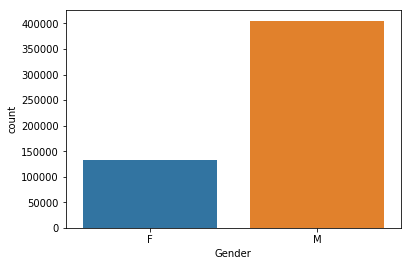

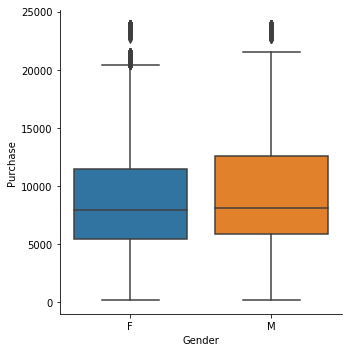

In [6]:
# Creating countplot for Gender charting 
sns.countplot(bFSales['Gender'])
bFSales.iloc[:,2].value_counts(dropna = False)

# Average spending as per Gender
sns.catplot('Gender','Purchase',data=bFSales , kind = "box")

Suprisingly,there are more male customers than females ,or mainly bill was payed by male customers.  
Also the average spending for both gender is same.

Let's see the age details of Customers.

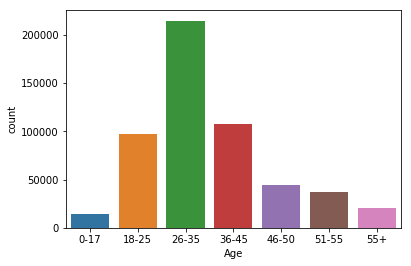

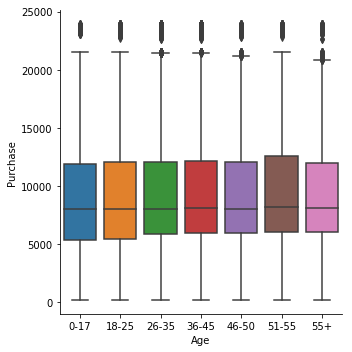

In [8]:
bFSales = bFSales.sort_values(by ='Age')

# Creating countplot for Age b 
sns.countplot(bFSales['Age'])
bFSales.iloc[:,3].value_counts(dropna = False)

# Average spending as per Age
sns.catplot('Age','Purchase', data=bFSales , kind = "box")

Most of the buyers are in age group 26-35. The boxplots show that average spending is same in all age groups.

We'll look into marital status of Customers

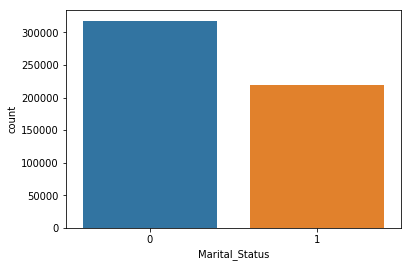

In [9]:
sns.countplot(bFSales['Marital_Status'])

There are more umarried buyers that married in the sale.

Let's have a look at cumulative view of all the details of Customers we have seen till now.

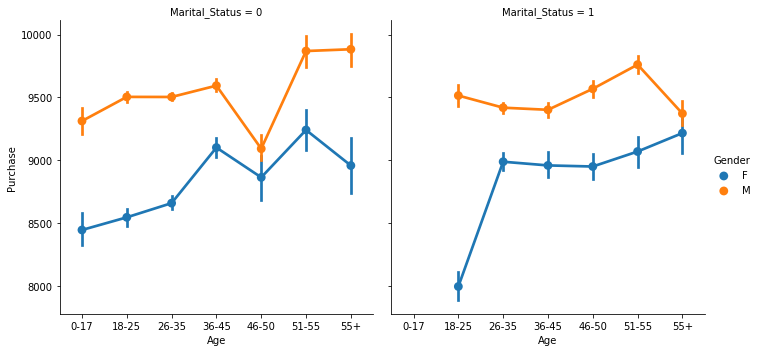

In [11]:
sns.catplot(x = 'Age', y = "Purchase", hue = "Gender" ,
            col ="Marital_Status",
            data = bFSales , kind = "point" )

Well we can say average spending is more by males than females in all age groups irrespective of marital status.
we can see noticable difference in average spending of married females of age group 18-15 to that of males.

Let's also check other details avaliable such as 'Occupation', 'City_Category', 'Stay_In_Current_City_Years'.

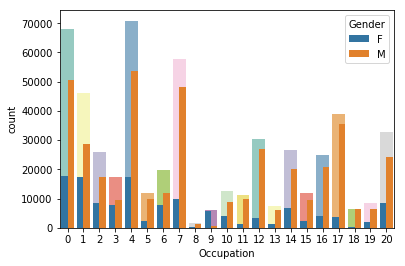

In [13]:
#Occupation countplot 
sns.countplot(bFSales['Occupation'] , palette = 'Set3')

sns.countplot(bFSales['Occupation'],hue = bFSales['Gender'])

There are around 20 different occupations to which Customers belong ,also almost all occupations have male majority.

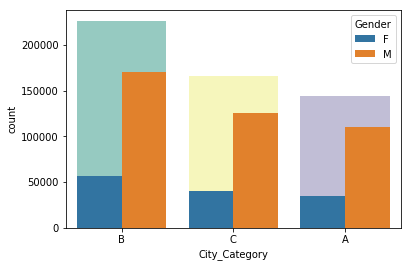

In [19]:
# Plotting City Category variable

sns.countplot(bFSales['City_Category'], palette = 'Set3')
sns.countplot(bFSales['City_Category'],hue = bFSales['Gender'])

Category B City have maximum buyers in all avaliable 3 categories.

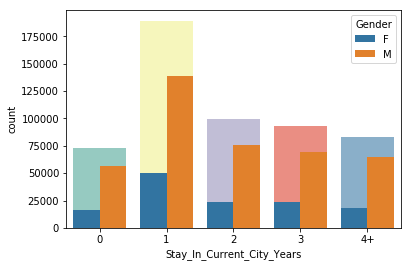

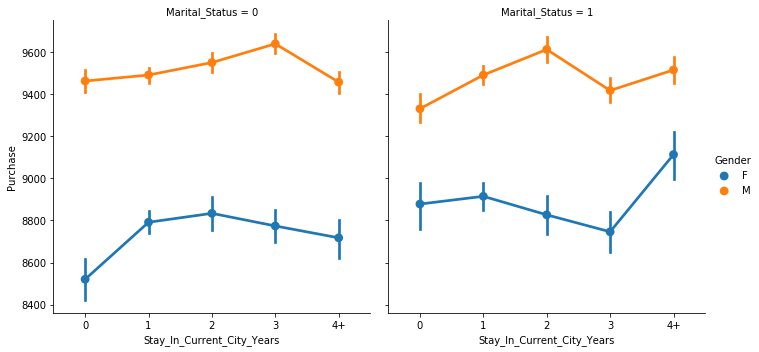

In [22]:
bFSales = bFSales.sort_values(by = 'Stay_In_Current_City_Years')

# Ploting Stay in city variable

sns.countplot(bFSales['Stay_In_Current_City_Years'], palette = 'Set3')
sns.countplot(bFSales['Stay_In_Current_City_Years'],hue = bFSales['Gender'])

sns.catplot('Stay_In_Current_City_Years','Purchase',
            hue='Gender',col = 'Marital_Status',data=bFSales , kind = "point")


Customers who are staying in city for around 1+ year are more likely to buy in Sale. 
Let's explore stay factor in more details.

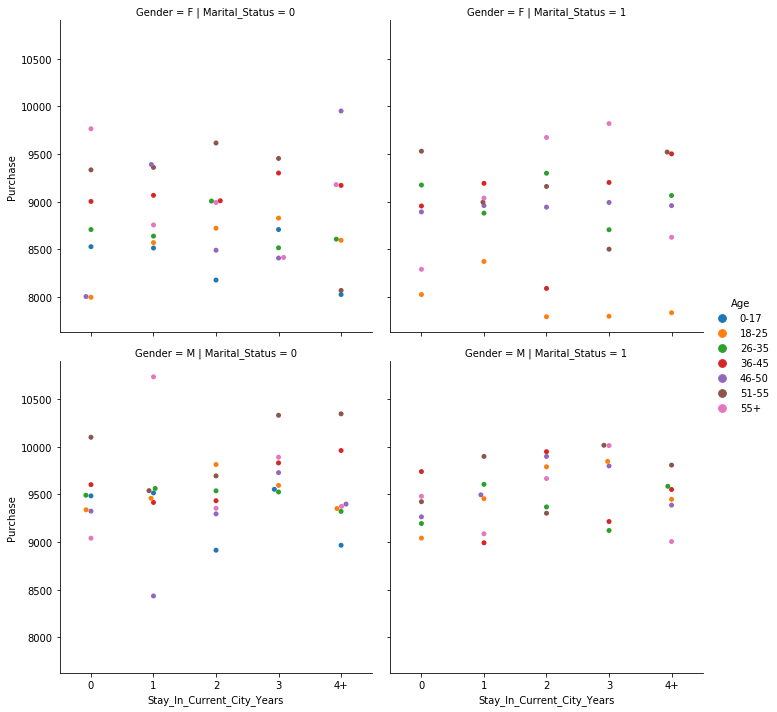

In [20]:
bFSales_RIS = bFSales.set_index(['Age','Gender','Marital_Status','Stay_In_Current_City_Years']).groupby(['Age','Gender','Marital_Status','Stay_In_Current_City_Years'])['Purchase'].mean().round().reset_index()

sns.catplot(x = 'Stay_In_Current_City_Years', y = "Purchase", hue = "Age" , row = "Gender",
            col ="Marital_Status",
            data = bFSales_RIS , kind = "swarm" )


Above graph shows average spending across all indicators,we can say married females of age group 18-25 are spending least 
in the sale.
There is interesting outlier of unmarried male buyers of 55+ age having stay of 1+ year in the city.

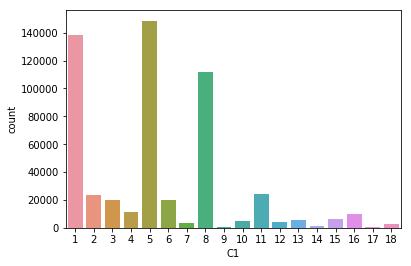

In [44]:
bFSales.rename(columns={'Product_Category_1': 'C1',
                        'Product_Category_2': 'C2',
                        'Product_Category_3': 'C3'}, inplace=True)

sns.countplot(bFSales['C1'])

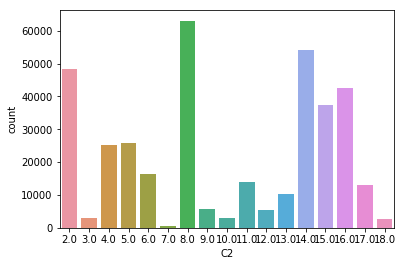

In [45]:
sns.countplot(bFSales['C2'])

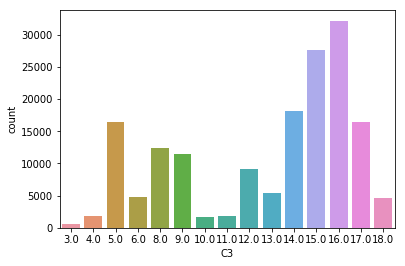

In [46]:
sns.countplot(bFSales['C3'])

There are 18 sub categories across 3 main categories. 

Let's figure out what are the categories of product which female customer prefer.
We will consider top 50 products bought by female customers.

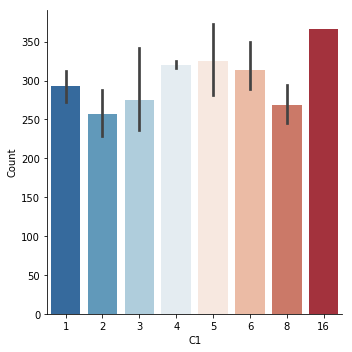

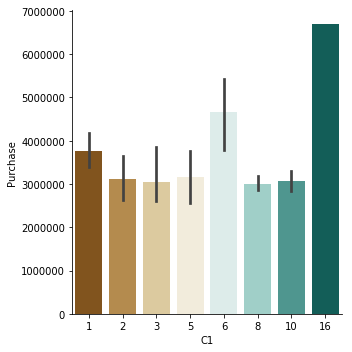

In [47]:
bFSales['Count'] = 1

bFSales_Prod = bFSales.groupby(['Product_ID','C1','Gender']).agg({'Count':'sum','Purchase':'sum'}).reset_index()

# Top 50 products with highest spending
bFSales_50n = bFSales_Prod[ bFSales_Prod['Gender'] == 'F'].nlargest(50, 'Purchase')

# Top 50 products highest bought in numbers
bFSales_50c = bFSales_Prod[ bFSales_Prod['Gender'] == 'F'].nlargest(50, 'Count')


sns.catplot(x= 'C1' ,y = 'Count' , data = bFSales_50c , kind = 'bar' , palette  = "RdBu_r")

sns.catplot(x= 'C1' ,y = 'Purchase' , data = bFSales_50n , kind = 'bar' ,palette  = "BrBG" )


We can say subcategory 16 has some highest selling and high cost products which females prefer.
Now We will consider top 50 products bought by male customers.

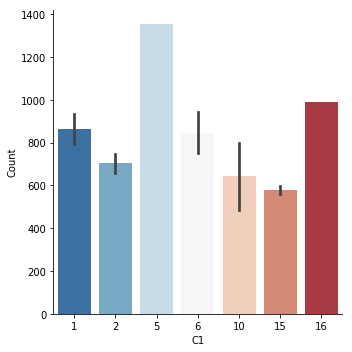

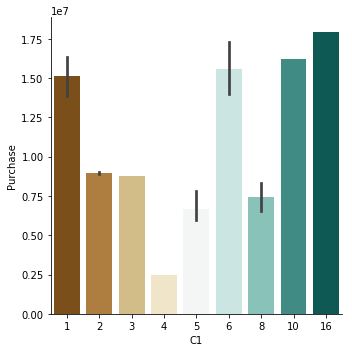

In [48]:

bFSales_50nm = bFSales_Prod[ bFSales_Prod['Gender'] == 'M'].nlargest(50, 'Purchase')
bFSales_50cm = bFSales_Prod[ bFSales_Prod['Gender'] == 'M'].nlargest(50, 'Count')

# Top 50 products with highest spending
sns.catplot(x= 'C1' ,y = 'Count' , data = bFSales_50nm , kind = 'bar' , palette  = "RdBu_r")

# Top 50 products highest bought in numbers
sns.catplot(x= 'C1' ,y = 'Purchase' , data = bFSales_50cm , kind = 'bar' ,palette  = "BrBG" )

In case of males subcategory 5,is most bought along with category 16.

Further analysis can be done on data depending on the business question .

We will conclude our analysis of Sales dataset here.